In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 构建随机的均值为0，标准差为1的矩阵X
X = np.random.normal(0, 1, size=(200, 2))
# 构造一个生成y的函数，让其值判断是大于1.5还是小于1.5，既将y值分类
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

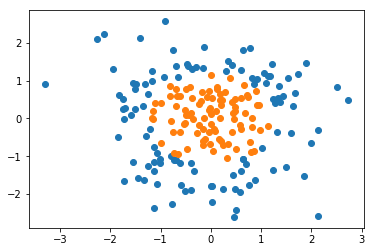

In [8]:
# 绘样本数据
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [10]:
from myML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LinearRegression()

In [11]:
log_reg.score(X, y)

0.42499999999999999

In [12]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#0000CD', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


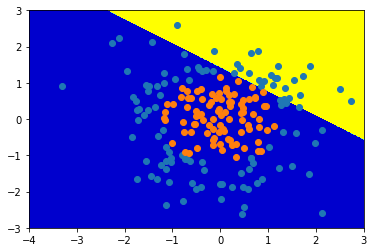

In [15]:
plot_decision_boundary(log_reg, axis=[-4, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [17]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scalar", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

In [18]:
ploy_log_reg = PolynomialLogisticRegression(degree=2)
ploy_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LinearRegression())])

In [19]:
ploy_log_reg.score(X, y)

0.97999999999999998

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


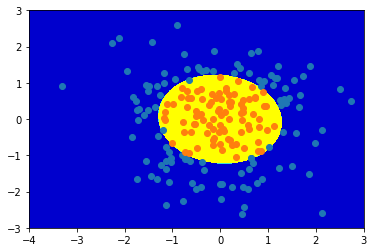

In [20]:
plot_decision_boundary(ploy_log_reg, axis=[-4, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()